In [1]:
# Read a sequence of 2 stereoscopic images, synchronized (frame 107 to 131 for video 1, frame 45 to 69 for video 2)
from PIL import Image
file_path="D:/Stereoscopy/selection/"
# Function to read, convert to BW, and assign to a variable
def read_and_convert_image(file_path):
    # Open the image
    img = Image.open(file_path)
    
    # Convert the image to black and white
    img_bw = img.convert('L')
    
    return img_bw

# List to store the variables for each image
dx_images = []

# Loop through the image filenames
for i in range(107, 131):
    # Generate the filename
    filename = file_path+f"dx_{str(i).zfill(3)}.jpg"
    
    # Read and convert the image, then assign to a variable
    img_variable = read_and_convert_image(filename)
    
    # Append the variable to the list
    dx_images.append(img_variable)

# List to store the variables for each image
sx_images = []

# Loop through the image filenames
for i in range(45, 69):
    # Generate the filename
    filename = file_path+f"sx_{str(i).zfill(3)}.jpg"
    
    # Read and convert the image, then assign to a variable
    img_variable = read_and_convert_image(filename)
    
    # Append the variable to the list
    sx_images.append(img_variable)

# Example: Accessing the first image variable
first_image = sx_images[0]


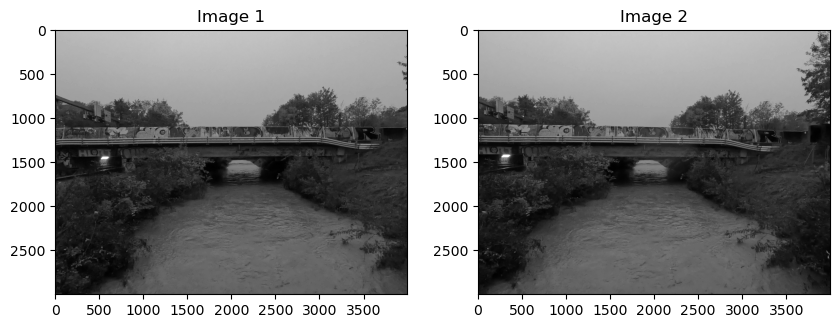

In [2]:
# Show two synchronized images
from PIL import Image
import matplotlib.pyplot as plt

# Assuming you already have bw_images from the previous code

# Access the first two images
image1 = sx_images[0]
image2 = dx_images[1]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left subplot
axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Image 1')

# Plot the second image on the right subplot
axes[1].imshow(image2, cmap='gray')
axes[1].set_title('Image 2')

# Display the images side by side
plt.show()

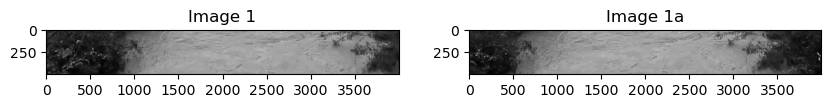

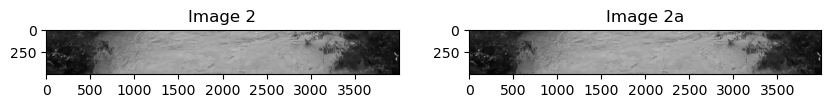

In [3]:
# select a band located approx 30 degrees downward, extract and show 2 subsequent frames with the two cameras
import numpy as np

# Assuming you already have bw_images from the previous code

# Define the y-axis range
start_y = 2250
end_y = 2750

# Define the size of the stripe
stripe_height = end_y - start_y
stripe_width = 4000

# Create an empty list to store the selected stripes
sx_stripes = []

# Loop through the images and select the stripe for each image
for img in sx_images:
    # Convert the image to a numpy array
    img_array = np.array(img)

    # Select the stripe using array slicing
    selected_stripe = img_array[start_y:end_y, :stripe_width]

    # Append the selected stripe to the list
    sx_stripes.append(selected_stripe)

    dx_stripes = []

# Loop through the images and select the stripe for each image
for img in dx_images:
    # Convert the image to a numpy array
    img_array = np.array(img)

    # Select the stripe using array slicing
    selected_stripe = img_array[start_y:end_y, :stripe_width]

    # Append the selected stripe to the list
    dx_stripes.append(selected_stripe)

# Now, 'stripes' is a list containing the selected stripes from each image



# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left subplot
axes[0].imshow(sx_stripes[0], cmap='gray')
axes[0].set_title('Image 1')

# Plot the second image on the right subplot
axes[1].imshow(dx_stripes[0], cmap='gray')
axes[1].set_title('Image 1a')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left subplot
axes[0].imshow(sx_stripes[1], cmap='gray')
axes[0].set_title('Image 2')

# Plot the second image on the right subplot
axes[1].imshow(dx_stripes[1], cmap='gray')
axes[1].set_title('Image 2a')

# Display the images side by side
plt.show()

In [4]:
# taille de la bande:
dx_stripes[0].shape

(500, 4000)

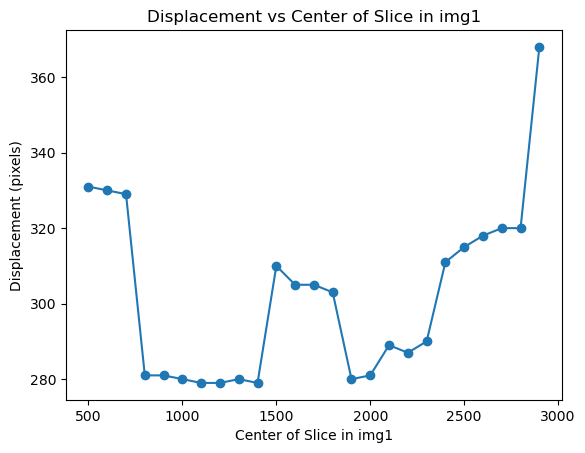

In [5]:
# detect displacement in pixels (normally, 0 for the banks)
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have two images named img1 and img2 (500x4000 pixels each)

# Set the size of the slices
slice_size = 500
img1 = dx_stripes[0]
img2 = sx_stripes[0]
img1_slice = img1[:, :slice_size]

# Initialize lists to store results
max_correlation_values = []
max_corr_center2_values = []
displacement_values = []

# Iterate through centers of the slice in img1
for center1 in range(slice_size, img1.shape[1] - 2 * slice_size - 1, 100):
    # Extract the slice from img1
    slice_img1 = img1[:, center1:center1 + slice_size]

    # Initialize variables for maximum correlation and displacement
    max_corr_value = -np.inf
    max_corr_center2 = None

    # Iterate through centers of the slice in img2
    for center2 in range(center1, center1 + slice_size):  # Assuming up to 250 pixels displacement
        # Extract the slice from img2
        slice_img2 = img2[:, center2:center2 + slice_size]

        # Calculate the cross-correlation using FFT
        # corr_result = correlate2d(slice_img1, slice_img2, mode='same', boundary='wrap')
        # Alternative: Correlation coefficient R (square root of r2)
        corr_result = np.corrcoef(np.reshape(slice_img1, -1), np.reshape(slice_img2, -1))[1, 0]

        # Store the correlation coefficient for each center2
        max_correlation_values.append(corr_result)
        max_corr_center2_values.append(center2 - center1)

        # Check if the current correlation is higher than the previous maximum
        if corr_result > max_corr_value:
            max_corr_value = corr_result
            max_corr_center2 = center2

    # Append the maximum correlation value and displacement to the lists for each center1
    max_correlation_values.append(max_corr_value)
    max_corr_center2_values.append(max_corr_center2)
    displacement_values.append(max_corr_center2 - center1)  # Calculate displacement

# Display the result
plt.plot(range(slice_size, img1.shape[1] - 2 * slice_size - 1, 100), displacement_values, marker='o')
plt.title('Displacement vs Center of Slice in img1')
plt.xlabel('Center of Slice in img1')
plt.ylabel('Displacement (pixels)')
plt.show()

Text(0.5, 1.0, 'Image 1a')

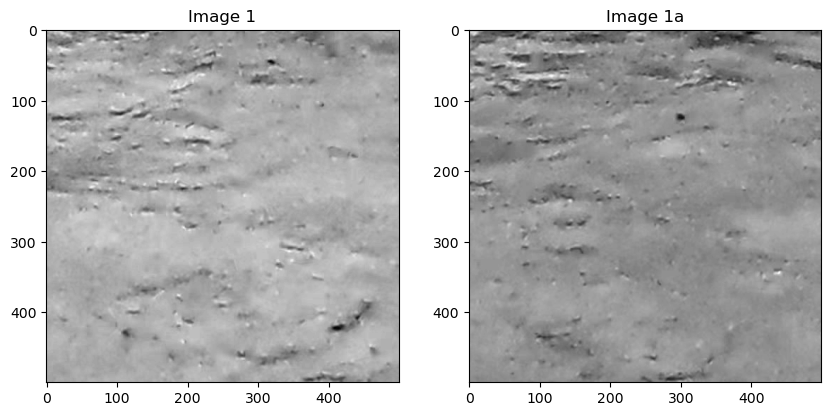

In [6]:
# Intéressant pour vérifier les images (attention, ici dx et sx sont inversés) mais pas utile pour le calcul
img1=sx_stripes[0]
img2=dx_stripes[10]
slice_size = 500
center1=2000
center2=1745
slice_img1 = img1[:, center1 - slice_size // 2:center1 + slice_size // 2]
slice_img2 = img2[:, center2 - slice_size // 2:center2 + slice_size // 2]
# Create a figure with two subplots
#corr_result = correlate2d(slice_img1, slice_img2, mode='same', boundary='wrap')
corr_result=np.corrcoef(np.reshape(slice_img1,-1), np.reshape(slice_img2,-1))[1,0]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left subplot
axes[0].imshow(slice_img1, cmap='gray')
axes[0].set_title('Image 1')

# Plot the second image on the right subplot
axes[1].imshow(slice_img2, cmap='gray')
axes[1].set_title('Image 1a')

Text(0.5, 1.0, 'Image 4')

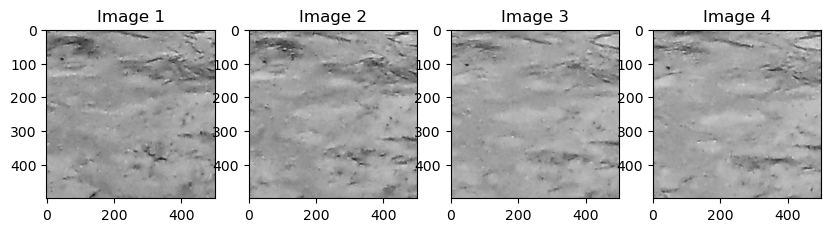

In [7]:
# Intéressant pour vérifier les images (attention, ici dx et sx sont inversés) mais pas utile pour le calcul
img1=dx_stripes[6]
img2=dx_stripes[7]
img3=dx_stripes[8]
img4=dx_stripes[9]

slice_size = 500
center1=2000
center2=2000
slice_img1 = img1[:, center1 - slice_size // 2:center1 + slice_size // 2]
slice_img2 = img2[:, center2 - slice_size // 2:center2 + slice_size // 2]
slice_img3 = img3[:, center1 - slice_size // 2:center1 + slice_size // 2]
slice_img4 = img4[:, center2 - slice_size // 2:center2 + slice_size // 2]

# Create a figure with two subplots
#corr_result = correlate2d(slice_img1, slice_img2, mode='same', boundary='wrap')
corr_result=np.corrcoef(np.reshape(slice_img1,-1), np.reshape(slice_img2,-1))[1,0]

fig, axes = plt.subplots(1,4, figsize=(10, 5))

# Plot the first image on the left subplot
axes[0].imshow(slice_img1, cmap='gray')
axes[0].set_title('Image 1')

# Plot the second image on the right subplot
axes[1].imshow(slice_img2, cmap='gray')
axes[1].set_title('Image 2')

# Plot the first image on the left subplot
axes[2].imshow(slice_img3, cmap='gray')
axes[2].set_title('Image 3')

# Plot the second image on the right subplot
axes[3].imshow(slice_img4, cmap='gray')
axes[3].set_title('Image 4')

int_win_size=array([50, 50])
search_win_size=array([100, 100])
max velocity that can be detected with these window sizes: [25 25]


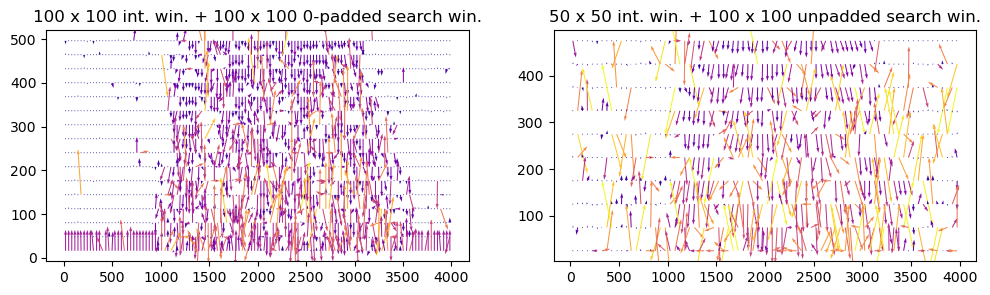

In [160]:
#Reprise des champs OpenPIV
from scipy.signal import correlate

a1=sx_stripes[7]
a2=sx_stripes[8]
win_size=100
def match_template(img, template, maxroll=8):
    best_dist = np.inf
    best_shift = (-1, -1)
    for y in range(maxroll):
        for x in range(maxroll):
            # calculate Euclidean distance
            dist = np.sqrt(np.sum((img - np.roll(template, (y, x), axis=(0, 1))) ** 2))
            if dist < best_dist:
                best_dist = dist
                best_shift = (y, x)
    return (best_dist, best_shift)

def vel_field(curr_frame, next_frame, win_size):
    ys = np.arange(0, curr_frame.shape[0], win_size)
    xs = np.arange(0, curr_frame.shape[1], win_size)
    dys = np.zeros((len(ys), len(xs)))
    dxs = np.zeros((len(ys), len(xs)))
    for iy, y in enumerate(ys):
        for ix, x in enumerate(xs):
            int_win = curr_frame[y : y + win_size, x : x + win_size]
            search_win = next_frame[y : y + win_size, x : x + win_size]
            cross_corr = correlate(
                search_win - search_win.mean(), int_win - int_win.mean(), method="fft"
            )
            dys[iy, ix], dxs[iy, ix] = (
                np.unravel_index(np.argmax(cross_corr), cross_corr.shape)
                - np.array([win_size, win_size])
                + 1
            )
    # draw velocity vectors from the center of each window
    ys = ys + win_size / 2
    xs = xs + win_size / 2
    return xs, ys, dxs, dys

xs, ys, dxs, dys = vel_field(a1, a2, 32)
norm_drs = np.sqrt(dxs ** 2 + dys ** 2)

def vel_field_asymmetric_wins(
    curr_frame, next_frame, half_int_win_size, half_search_win_size
):
    ys = np.arange(half_int_win_size[0], curr_frame.shape[0], 2 * half_int_win_size[0])
    xs = np.arange(half_int_win_size[1], curr_frame.shape[1], 2 * half_int_win_size[1])
    dys = np.zeros((len(ys), len(xs)))
    dxs = np.zeros((len(ys), len(xs)))
    for iy, y in enumerate(ys):
        for ix, x in enumerate(xs):
            int_win = curr_frame[
                y - half_int_win_size[0] : y + half_int_win_size[0],
                x - half_int_win_size[1] : x + half_int_win_size[1],
            ]
            search_win_y_min = y - half_search_win_size[0]
            search_win_y_max = y + half_search_win_size[0]
            search_win_x_min = x - half_search_win_size[1]
            search_win_x_max = x + half_search_win_size[1]
            truncated_search_win = next_frame[
                max(0, search_win_y_min) : min(a1.shape[0], search_win_y_max),
                max(0, search_win_x_min) : min(a1.shape[1], search_win_x_max),
            ]
            cross_corr = correlate(
                truncated_search_win - np.mean(truncated_search_win),
                int_win - np.mean(int_win),
                mode="valid",
                method="fft",
            )
            dy, dx = np.unravel_index(np.argmax(cross_corr), cross_corr.shape)
            # if the top of the search window got truncated, shift the origin
            # up to the top edge of the (non-truncated) search window
            if search_win_y_min < 0:
                dy += -search_win_y_min
            # if the left of the search window got truncated, shift the origin
            # over to the left edge of the (non-truncated) search window
            if search_win_x_min < 0:
                dx += -search_win_x_min
            # shift origin to the center of the search window
            dy -= half_search_win_size[0] - half_int_win_size[0]
            dx -= half_search_win_size[1] - half_int_win_size[1]
            dys[iy, ix] = dy
            dxs[iy, ix] = dx
    return xs, ys, dxs, dys

int_win_size = np.array([50, 50])
print(f"{int_win_size=}")
assert np.all(np.array(a1.shape) % int_win_size == 0)
assert np.all(int_win_size % 2 == 0)
half_int_win_size = int_win_size // 2

search_win_size = int_win_size * 2
print(f"{search_win_size=}")
assert np.all(search_win_size % 2 == 0)
half_search_win_size = search_win_size // 2
assert np.all(search_win_size > int_win_size)
print(
    "max velocity that can be detected with these window sizes: "
    + f"{half_search_win_size - half_int_win_size}"
)
xs_asym, ys_asym, dxs_asym, dys_asym = vel_field_asymmetric_wins(
    a1, a2, half_int_win_size, half_search_win_size
)
norm_drs_asym = np.sqrt(dxs_asym ** 2 + dys_asym ** 2)

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].quiver(
    xs,
    ys[::-1],
    dxs,
    -dys,
    norm_drs,
    cmap="plasma",
    angles="xy",
    scale_units="xy",
    scale=0.25,
)
axs[1].quiver(
    xs_asym,
    ys_asym[::-1],
    dxs_asym,
    -dys_asym,
    norm_drs_asym,
    cmap="plasma",
    angles="xy",
    scale_units="xy",
    scale=0.25,
)
axs[0].set_title(
    f"{win_size} x {win_size} int. win. + "
    f"{win_size} x {win_size} 0-padded search win."
)
axs[1].set_title(
    f"{int_win_size[0]} x {int_win_size[1]} int. win. + "
    f"{search_win_size[0]} x {search_win_size[0]} unpadded search win."
)
#ax.set_aspect("equal")
plt.show()

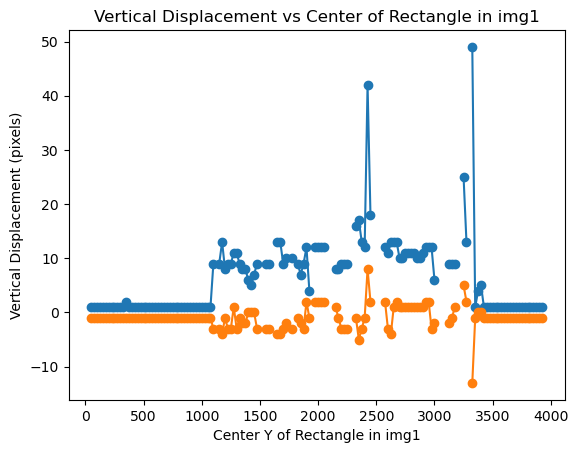

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have two subsequent frames named sx_frame[0] and sx_frame[1]

# Set the size of the rectangle
rect_size = (50, 50)

# Initialize lists to store results
max_correlation_values = []
max_corr_center2_values = []
displacement_values = []

# Extract the two subsequent frames
img1 = sx_stripes[13]
img2 = sx_stripes[14]
img3 = sx_stripes[14]


# Iterate through centers of the rectangle in img1
for center1_y in range(rect_size[1], img1.shape[1]-rect_size[1], rect_size[1]//2):
    center1_x=img1.shape[0]//2
    # Extract the rectangle from img1
    rect_img1 = img1[center1_x:center1_x + rect_size[0],center1_y:center1_y + rect_size[1] ]

    # Initialize variables for maximum correlation and displacement
    max_corr_value = -np.inf
    max_corr_center2 = None

    # Iterate through centers of the rectangle in img2
    
    for center2_x in range(center1_x, center1_x+rect_size[0] ):
          for center2_y in range( (-center2_x+center1_x)//4, (center2_x-center1_x)//4,1):      
                
                #for center2_x in range(center1_x, center1_x + rect_size[1]):
                # Extract the rectangle from img2
                rect_img2 = img2[center2_x:center2_x + rect_size[0], center1_y+center2_y:center1_y + rect_size[1]+center2_y  ]
                
                # Calculate the cross-correlation using FFT
                corr_result = np.corrcoef(np.reshape(rect_img1, -1), np.reshape(rect_img2, -1))[1, 0]
                
                # Store the correlation coefficient for each center2
                max_correlation_values.append(corr_result)
                max_corr_center2_values.append((center2_x-center1_x, center2_y))

                # Check if the current correlation is higher than the previous maximum
                if corr_result > max_corr_value:
                    max_corr_value = corr_result
                    max_corr_center2 = (center2_x-center1_x, center2_y)
                    #print(center1_y,max_corr_center2,max_corr_value)
    if max_corr_value< 0.50:
            max_corr_value=None
            max_corr_center2=(None,None)
                
        # Append the maximum correlation value and displacement to the lists for each center1
    max_correlation_values.append(max_corr_value)
    max_corr_center2_values.append(max_corr_center2)
    displacement_values.append(max_corr_center2)  # Calculate displacement
# Display the result
plt.plot(range(rect_size[1], img1.shape[1] - rect_size[1] - 1, rect_size[1]//2), displacement_values, marker='o')
# [x for x,_ in displacement_values] to display first line
plt.title('Vertical Displacement vs Center of Rectangle in img1')
plt.xlabel('Center Y of Rectangle in img1')
plt.ylabel('Vertical Displacement (pixels)')
plt.show()

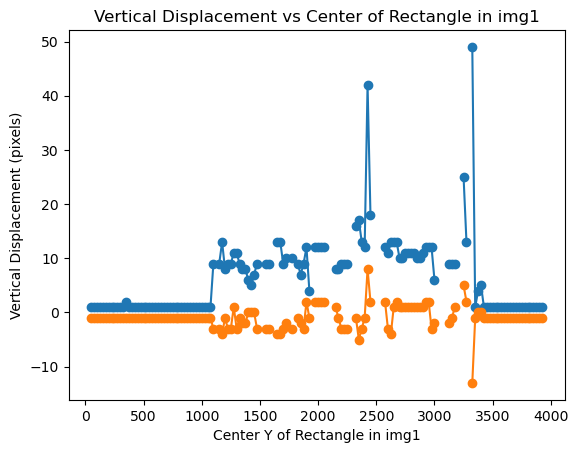

In [154]:
plt.plot(range(rect_size[1], img1.shape[1] - rect_size[1] - 1, rect_size[1]//2), displacement_values, marker='o')
# [x for x,_ in displacement_values] to display first line
plt.title('Vertical Displacement vs Center of Rectangle in img1')
plt.xlabel('Center Y of Rectangle in img1')
plt.ylabel('Vertical Displacement (pixels)')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (76,) and (151,)

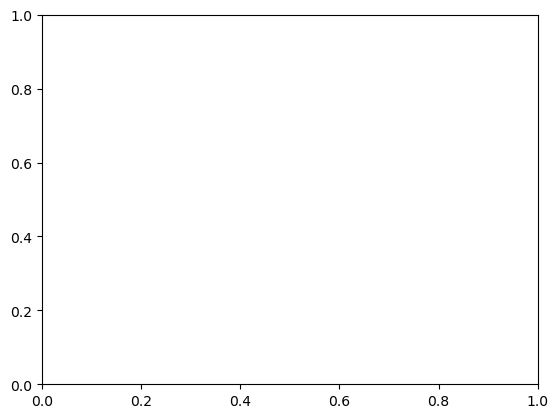

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have two subsequent frames named sx_frame[0] and sx_frame[1]

# Set the size of the rectangle
rect_size = (50, 50)

# Initialize lists to store results
max_correlation_values = []
max_corr_center2_values = []
displacement_values = []


# Extract the two subsequent frames
img1 = dx_stripes[1]
img2 = dx_stripes[5]


# Iterate through centers of the rectangle in img1
for center1_y in range(rect_size[1], img1.shape[1]-rect_size[1], rect_size[1]//2):
    center1_x=img1.shape[0]//2
    # Extract the rectangle from img1
    rect_img1 = img1[center1_x:center1_x + rect_size[0],center1_y:center1_y + rect_size[1] ]

    # Initialize variables for maximum correlation and displacement
    max_corr_value = -np.inf
    max_corr_center2 = None

    # Iterate through centers of the rectangle in img2
    
    for center2_x in range(center1_x, center1_x+rect_size[0] ):
          for center2_y in range( (-center2_x+center1_x)//4, (center2_x-center1_x)//4,1):      
                
                #for center2_x in range(center1_x, center1_x + rect_size[1]):
                # Extract the rectangle from img2
                rect_img2 = img2[center2_x:center2_x + rect_size[0], center1_y+center2_y:center1_y + rect_size[1]+center2_y  ]
                
                # Calculate the cross-correlation using FFT
                corr_result = np.corrcoef(np.reshape(rect_img1, -1), np.reshape(rect_img2, -1))[1, 0]
                
                # Store the correlation coefficient for each center2
                max_correlation_values.append(corr_result)
                max_corr_center2_values.append((center2_x-center1_x, center2_y))

                # Check if the current correlation is higher than the previous maximum
                if corr_result > max_corr_value:
                    max_corr_value = corr_result
                    max_corr_center2 = (center2_x-center1_x, center2_y)
                    #print(center1_y,max_corr_center2,max_corr_value)
    if max_corr_value< 0.50:
            max_corr_value=None
            max_corr_center2=(None,None)
                
        # Append the maximum correlation value and displacement to the lists for each center1
    max_correlation_values.append(max_corr_value)
    max_corr_center2_values.append(max_corr_center2)
    displacement_values.append(max_corr_center2)  # Calculate displacement
# Display the result
plt.plot(range(rect_size[1], img1.shape[1] - rect_size[1] - 1, rect_size[1]//2), displacement_values, marker='o')
# [x for x,_ in displacement_values] to display first line
plt.title('Vertical Displacement vs Center of Rectangle in img1')
plt.xlabel('Center Y of Rectangle in img1')
plt.ylabel('Vertical Displacement (pixels)')
plt.show()

In [88]:
range(center1_y+center2_y,center1_y + rect_size[1]+center2_y,1)

range(3951, 4001)

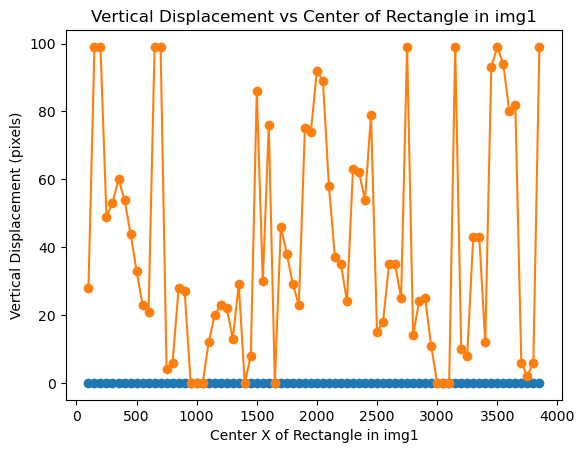

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have two subsequent frames named sx_stripes[1] and sx_stripes[2]

# Set the size of the rectangle
rect_size = (100, 100)

# Initialize lists to store results
max_correlation_values = []
max_corr_center2_values = []
displacement_values = []

# Extract the two subsequent frames
img1 = sx_stripes[1]
img2 = sx_stripes[2]

# Iterate through centers of the rectangle in img1 with a step of 25 pixels
for center1_x in range(rect_size[0], img1.shape[1] - rect_size[0] - 1, rect_size[0]//2):
    
    rect_img1 = img1[img1.shape[0] // 2 - rect_size[1]:img1.shape[0] // 2, center1_x:center1_x + rect_size[1]]

    # Initialize variables for maximum correlation and displacement
    max_corr_value = -np.inf
    max_corr_center2 = None

    # Center2_x is always equal to center1_x
    center2_x = center1_x

    # Iterate through centers of the rectangle in img2 (only along the y-axis)
    for center2_y in range(img1.shape[0] // 2 - rect_size[1], img1.shape[0] // 2):
        # Extract the rectangle from img2
        rect_img2 = img2[center2_y:center2_y + rect_size[1], center2_x - rect_size[0]:center2_x]

        # Ensure that rect_img1 and rect_img2 have the same size
        rect_img1 = rect_img1[:, :rect_img2.shape[1]]
        
        # Calculate the cross-correlation using FFT
        corr_result = np.corrcoef(np.reshape(rect_img1, -1), np.reshape(rect_img2, -1))[1, 0]

        # Store the correlation coefficient for each center2
        max_correlation_values.append(corr_result)
        max_corr_center2_values.append((center2_x, center2_y))

        # Check if the current correlation is higher than the previous maximum
        if corr_result > max_corr_value:
            max_corr_value = corr_result
            max_corr_center2 = (center2_x, center2_y)

    # Append the maximum correlation value and displacement to the lists for each center1_x
    max_correlation_values.append(max_corr_value)
    max_corr_center2_values.append(max_corr_center2)
    displacement_values.append((max_corr_center2[0] - center1_x, max_corr_center2[1] - (img1.shape[0] // 2 - rect_size[1])))

# Display the result
plt.plot(range(rect_size[0], img1.shape[1] - rect_size[0] - 1, rect_size[0]//2), displacement_values, marker='o')
plt.title('Vertical Displacement vs Center of Rectangle in img1')
plt.xlabel('Center X of Rectangle in img1')
plt.ylabel('Vertical Displacement (pixels)')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (156,) and (152, 2)

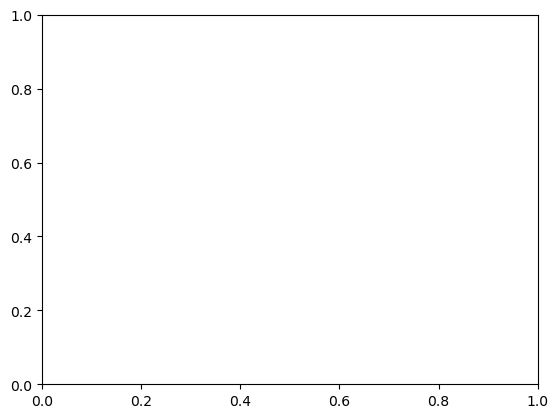

In [19]:
np.reshape(rect_img2, -1)

array([], dtype=uint8)

In [29]:
img2[center2_y:center2_y + rect_size[1], center2_x - rect_size[0]+center3_x :center2_x+center3_x].shape

(50, 0)

In [31]:
img2[center2_y:center2_y + rect_size[1], center2_x - rect_size[0]-10 :center2_x-10].shape

(50, 0)

In [33]:
center2_x - rect_size[0]

0

In [25]:
center3_x

-50

In [27]:
center2_x

50